# This notebook shows how to use my spike removal algorithm on gm2 data, and displays some of the effects and features

In [7]:
#Import python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sb

#Import my functions
import sys
sys.path.append('..')
from treat_data import direct_removal, repeat_averager, spike_removal, phi_selection
from my_spike import my_spike_removal, get_derivative

#specify the data dir
data_dir = './testdata/'


# Set some variables

In [8]:
phi_low = -1
phi_high = 361
res_thresh = 250
res_arr = np.empty(0)
avg_rms_arr = np.empty(0)
phi_list = [] 
freq_list = []

 ##  Calculate and store the resolution for each probe, which will then later be used as a parameter in the spike removal
 __loop over the trolley probes and store each one's phi and freq dist__


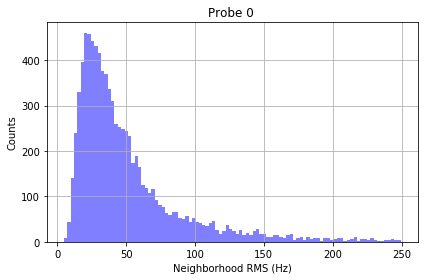

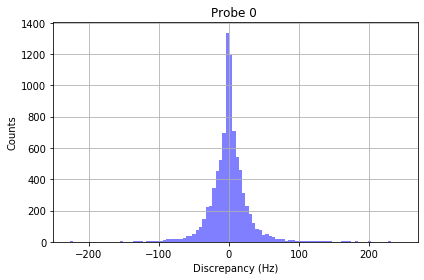

res= 28.254552502109217 avg neighborhood RMS= 50.287229473053415


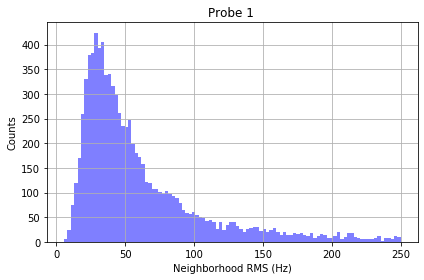

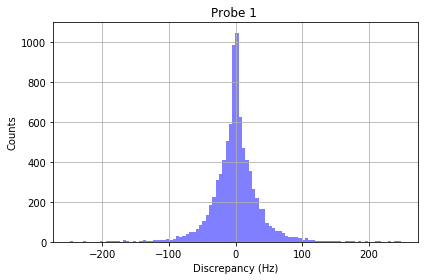

res= 37.163538479511104 avg neighborhood RMS= 59.707463140863105


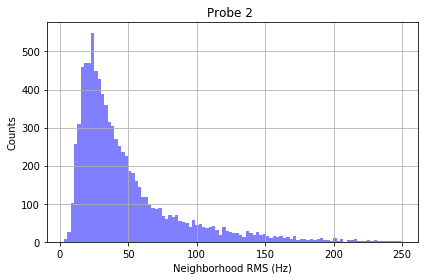

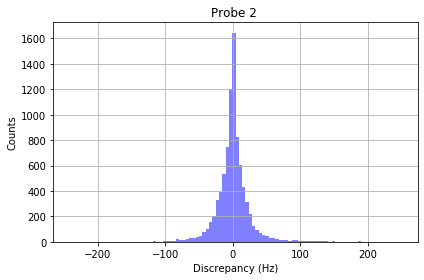

res= 26.811451491700907 avg neighborhood RMS= 47.58753905326486


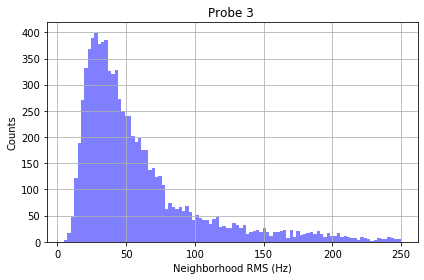

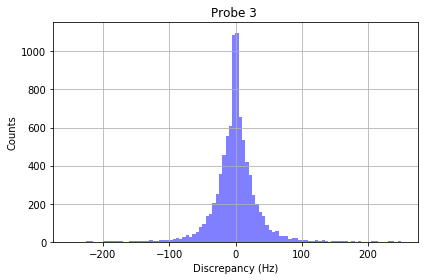

res= 35.25367430969577 avg neighborhood RMS= 58.12192240625962


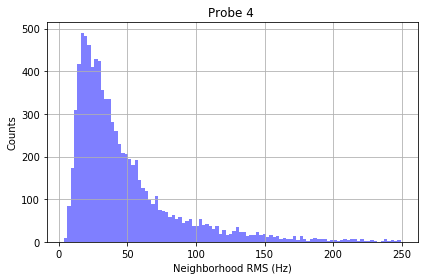

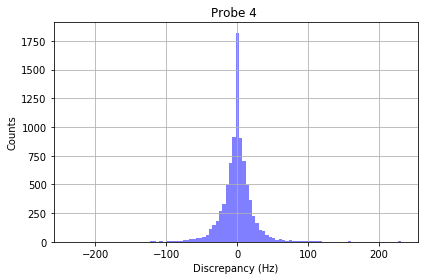

res= 25.777876750643284 avg neighborhood RMS= 47.08046826422134


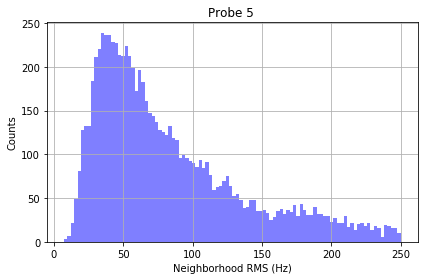

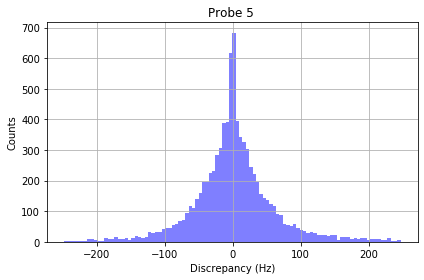

res= 60.18099655411212 avg neighborhood RMS= 83.17345772023964


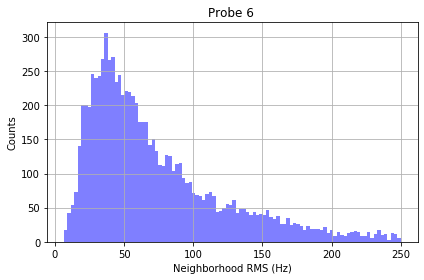

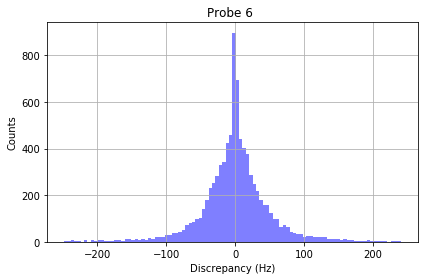

res= 50.3328334095404 avg neighborhood RMS= 72.76708460431718


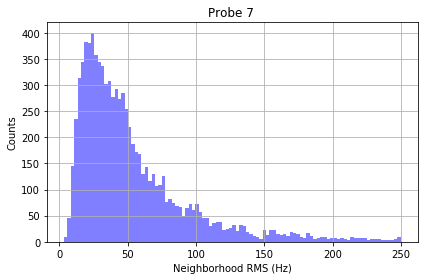

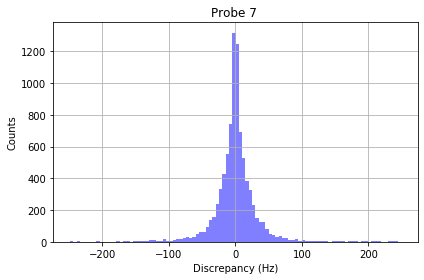

res= 32.32181068480556 avg neighborhood RMS= 53.11452085686274


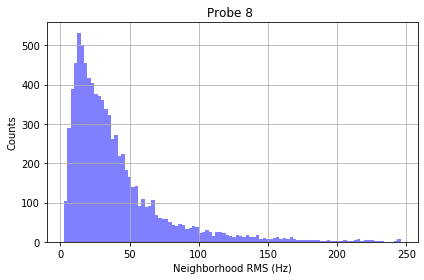

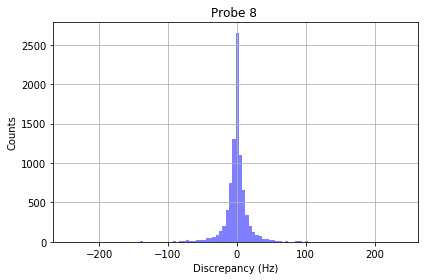

res= 20.105515402102878 avg neighborhood RMS= 39.09738241775381


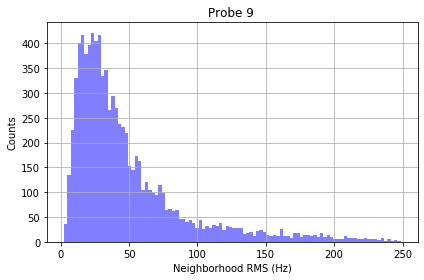

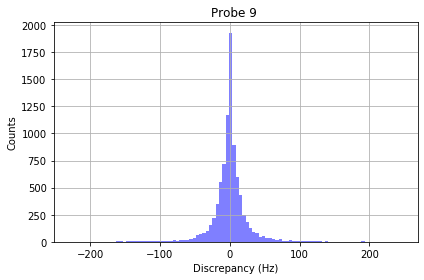

res= 27.40578725953993 avg neighborhood RMS= 48.419086726752155


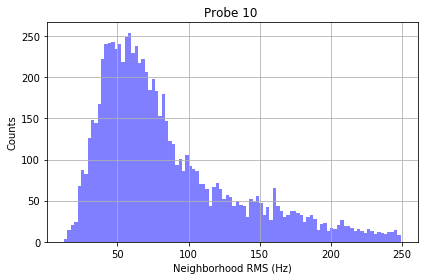

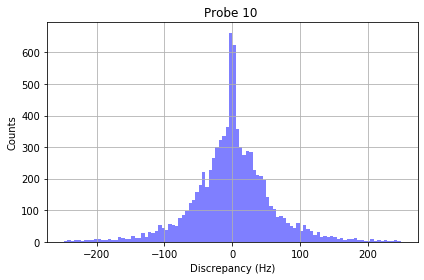

res= 59.273534650374344 avg neighborhood RMS= 84.70001826587573


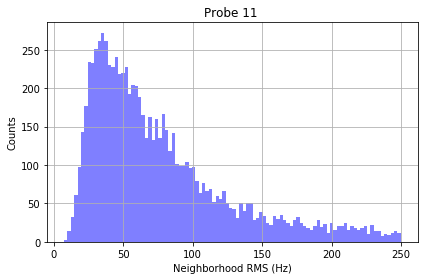

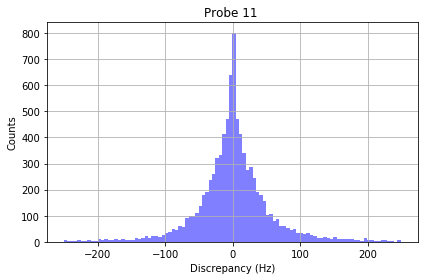

res= 54.14845069626791 avg neighborhood RMS= 76.4031491445007


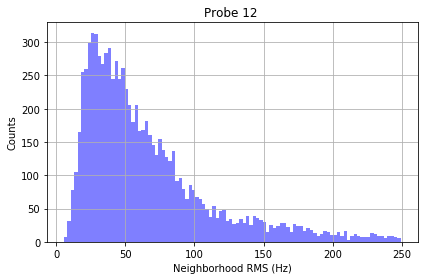

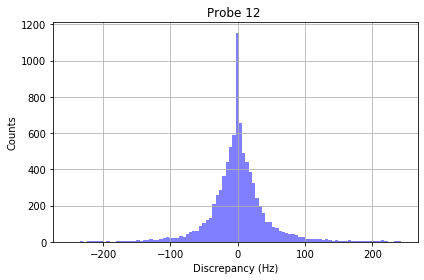

res= 43.994732291059854 avg neighborhood RMS= 65.13841863766402


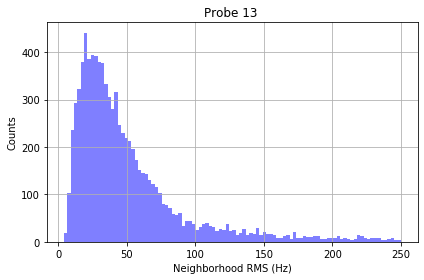

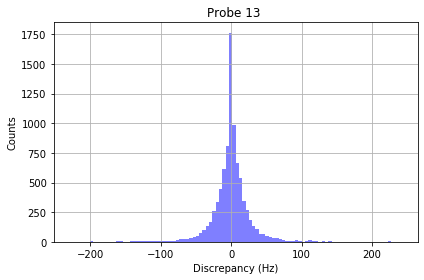

res= 27.85082307953166 avg neighborhood RMS= 50.59758749395055


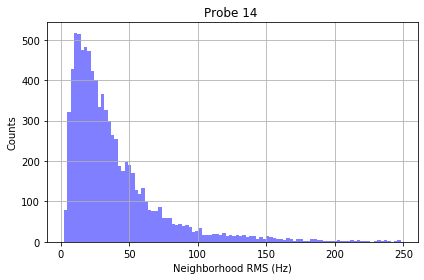

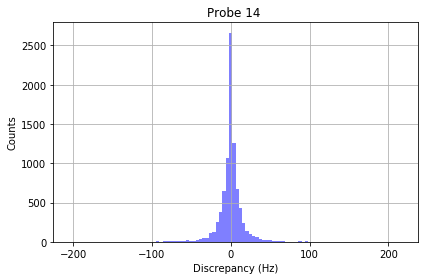

res= 16.404569893974852 avg neighborhood RMS= 38.64505881471963


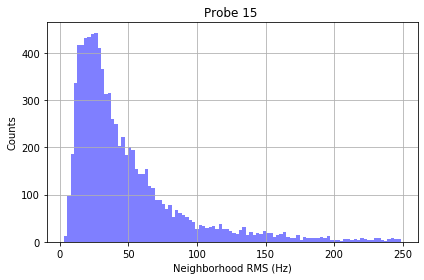

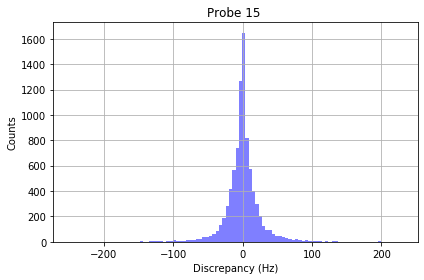

res= 26.67380967468113 avg neighborhood RMS= 48.013539123736635


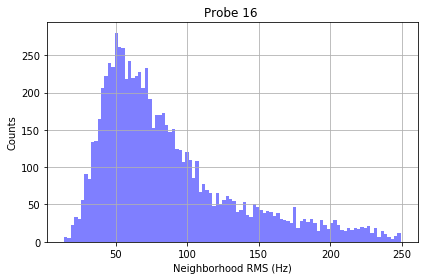

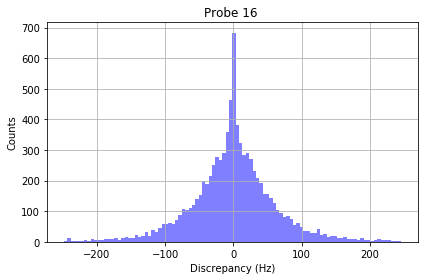

res= 61.750290226404765 avg neighborhood RMS= 86.55862771671872


In [9]:
# mpld3.enable_notebook()

for probe in range(17):
    file_path = data_dir + 'Run3956Probe' + str(probe) + '.txt'
#     print("running on probe",probe,":", "file_path=", file_path)
      #read the data into a pandas dataframe
    df = pd.read_csv(file_path,  delimiter = ',',comment='#', names=['Phi','Frequency'])
    # Convert the df to a numpy ndarray
    data = df.values
    phi = data[:,0]
    freq = data[:,1]

            
    #Treat the data
    #Sort according to phi
    arr1inds = phi.argsort()
    phi = phi[arr1inds[::1]]
    freq = freq[arr1inds[::1]]
    #Look at sub-region around the ring
    phi, freq = phi_selection(phi,freq,phi_low,phi_high)
    #Direct outlier removal
    phi,freq = direct_removal(phi,freq,20.0)
    #Average repeated points
    phi,freq = repeat_averager(phi,freq)
    
    #Save freq and phi into lists
    freq_list.append(freq)
    phi_list.append(phi)
    
    
    #calculate the resolution for each probe and plot the relevant distributions
    disc_arr, rms_arr = my_spike_removal(phi,freq,1,10,3)
    index = np.argwhere( (abs(disc_arr) > res_thresh))
    disc_arr = np.delete(disc_arr, index)
    index = np.argwhere( (abs(rms_arr) > res_thresh))
    rms_arr = np.delete(rms_arr, index)
    res = np.sqrt(np.var(disc_arr))
    avg_rms = np.mean(rms_arr)
    plt.hist(rms_arr, 100, facecolor='blue', alpha=0.5)
    plt.title('Probe {} '.format(probe))
    plt.xlabel('Neighborhood RMS (Hz)')
    plt.ylabel('Counts')
    plt.grid()
    plt.tight_layout()
    plt.show()
    plt.hist(disc_arr, 100, facecolor='blue', alpha=0.5)
    plt.title('Probe {} '.format(probe))
    plt.ylabel('Counts')
    plt.xlabel('Discrepancy (Hz)')
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    res_arr = np.append(res_arr,res)
    avg_rms_arr = np.append(avg_rms_arr,avg_rms)
    print("res=",res, 'avg neighborhood RMS=',avg_rms)


# Plot the avg neighborhood RMS vs the resolution for each probe

17
17


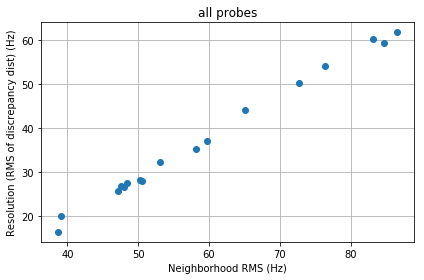

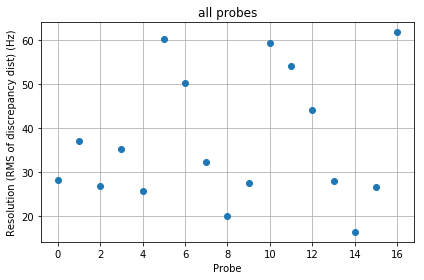

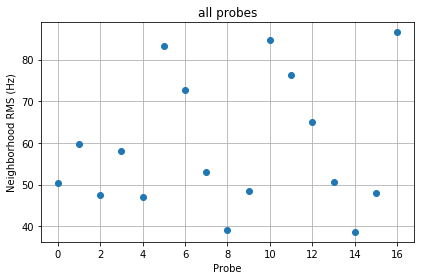

In [4]:
print(res_arr.size)
print(avg_rms_arr.size)
# mpld3.enable_notebook()
mpld3.disable_notebook()


plt.plot(avg_rms_arr,res_arr,'o')
plt.title("all probes")
plt.xlabel('Neighborhood RMS (Hz)')
plt.ylabel('Resolution (RMS of discrepancy dist) (Hz)')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(res_arr,'o')
plt.title("all probes")
plt.ylabel('Resolution (RMS of discrepancy dist) (Hz)')
plt.xlabel('Probe')
plt.grid()
plt.tight_layout()
plt.show()


plt.plot(avg_rms_arr,'o')
plt.title("all probes")
plt.ylabel('Neighborhood RMS (Hz)')
plt.xlabel('Probe')
plt.grid()
plt.tight_layout()
plt.show()



__Although each probe is treated independently, it's interesting to see the total resolution and neighborhood RMS, combining all trolley probes__

In [10]:
print("total trolley res = {0:6.2f} +/- {1:6.2f}".format(np.mean(res_arr),np.sqrt(np.var(res_arr)) ))
print("total neighborhood rms = {0:6.2f} +/- {1:6.2f}".format(np.mean(avg_rms_arr),np.sqrt(np.var(avg_rms_arr)) ))

total trolley res =  37.28 +/-  14.33
total neighborhood rms =  59.38 +/-  15.40


## For each probe, apply the spike removal three times

__since applying the spike removal reduces local rms, "hiding" spikes are uncovered in each subsequent pass__

__The spikes that are removed in the first, second, and third pass are distinquised by color__

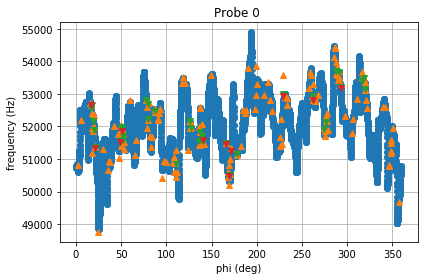

probe 0 : res=   28.25 : 1st pass left   98.19% : 2nd pass left   97.76% : 3rd pass left   97.64%


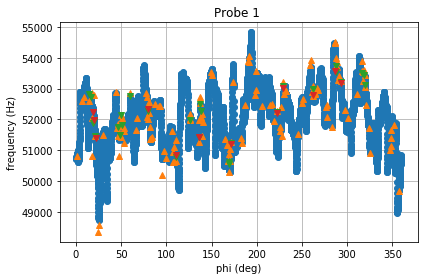

probe 1 : res=   37.16 : 1st pass left   98.35% : 2nd pass left   98.03% : 3rd pass left   97.89%


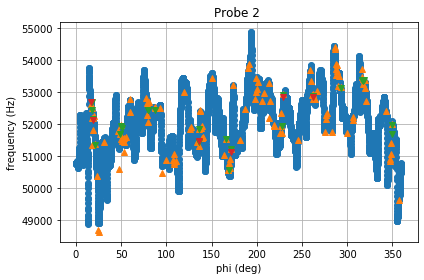

probe 2 : res=   26.81 : 1st pass left   98.57% : 2nd pass left   98.29% : 3rd pass left   98.22%


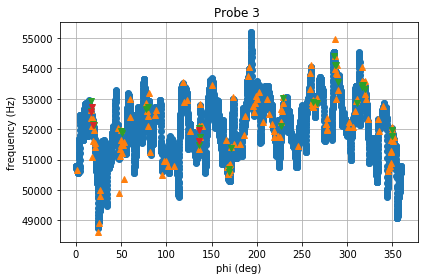

probe 3 : res=   35.25 : 1st pass left   98.42% : 2nd pass left   98.09% : 3rd pass left   98.03%


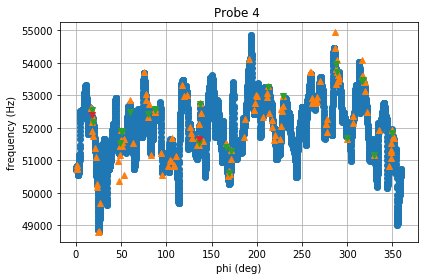

probe 4 : res=   25.78 : 1st pass left   98.48% : 2nd pass left   98.21% : 3rd pass left   98.19%


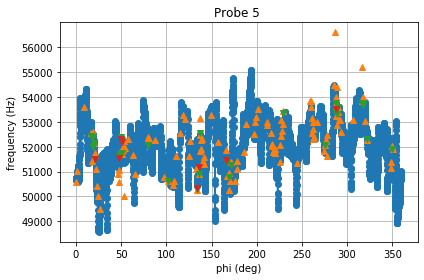

probe 5 : res=   60.18 : 1st pass left   98.54% : 2nd pass left   98.20% : 3rd pass left   98.11%


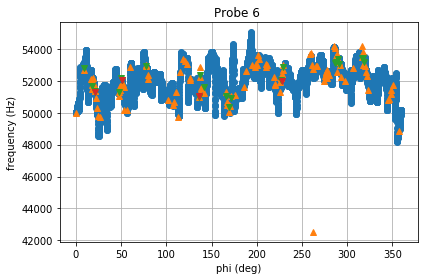

probe 6 : res=   50.33 : 1st pass left   98.65% : 2nd pass left   98.39% : 3rd pass left   98.34%


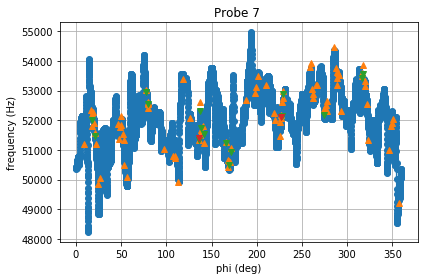

probe 7 : res=   32.32 : 1st pass left   98.96% : 2nd pass left   98.78% : 3rd pass left   98.75%


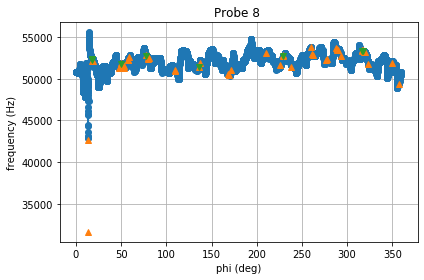

probe 8 : res=   20.11 : 1st pass left   99.47% : 2nd pass left   99.38% : 3rd pass left   99.38%


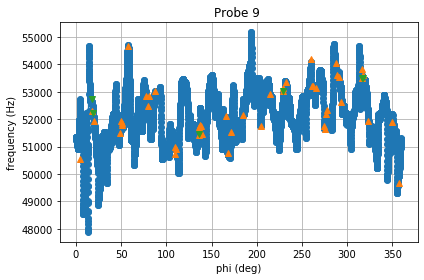

probe 9 : res=   27.41 : 1st pass left   99.46% : 2nd pass left   99.39% : 3rd pass left   99.39%


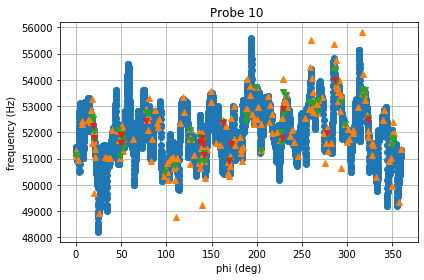

probe 10 : res=   59.27 : 1st pass left   97.65% : 2nd pass left   97.01% : 3rd pass left   96.82%


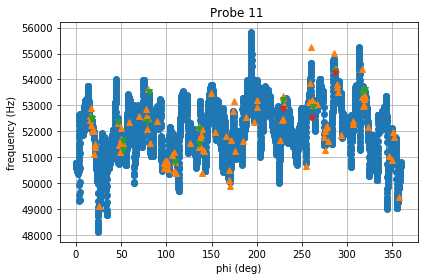

probe 11 : res=   54.15 : 1st pass left   98.77% : 2nd pass left   98.58% : 3rd pass left   98.55%


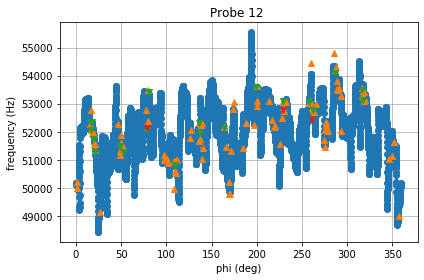

probe 12 : res=   43.99 : 1st pass left   98.85% : 2nd pass left   98.60% : 3rd pass left   98.57%


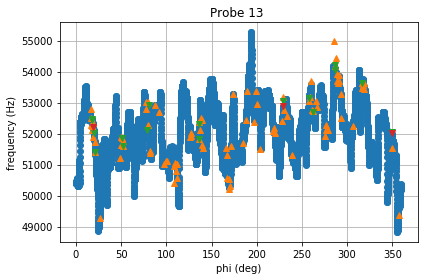

probe 13 : res=   27.85 : 1st pass left   98.88% : 2nd pass left   98.69% : 3rd pass left   98.65%


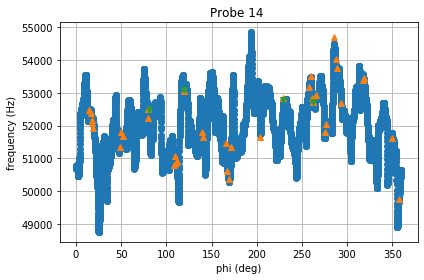

probe 14 : res=   16.40 : 1st pass left   99.56% : 2nd pass left   99.52% : 3rd pass left   99.52%


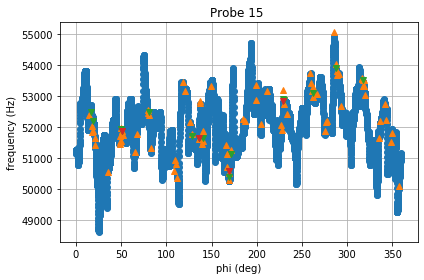

probe 15 : res=   26.67 : 1st pass left   99.05% : 2nd pass left   98.87% : 3rd pass left   98.82%


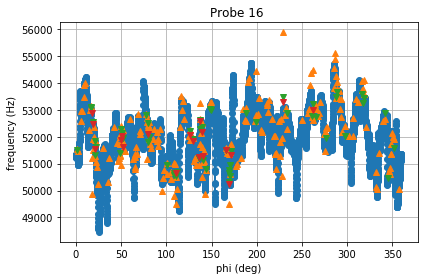

probe 16 : res=   61.75 : 1st pass left   97.42% : 2nd pass left   96.77% : 3rd pass left   96.55%


In [11]:
for probe in range(17):

    phi = phi_list[probe]
    freq = freq_list[probe]
    res = res_arr[probe]
    
    #do the first removal and show it
    new_phi,new_freq,removed_phi,removed_freq = my_spike_removal(phi,freq,1,res,1)
    size = freq.size
    size2 = new_freq.size

    #do the second removal
    new_phi,new_freq,removed2_phi,removed2_freq = my_spike_removal(new_phi,new_freq,1,res,1)
    size3 = new_freq.size
    
    #do the third removal
    new_phi,new_freq,removed3_phi,removed3_freq = my_spike_removal(new_phi,new_freq,1,res,1)
    size4 = new_freq.size
    
    #show the plots
    plt.plot(new_phi,new_freq,'o-')
    plt.plot(removed_phi,removed_freq,'^')
    plt.plot(removed2_phi,removed2_freq,'v')
    plt.plot(removed3_phi,removed3_freq,'v')
    plt.title('Probe {} '.format(probe))
    plt.ylabel('frequency (Hz)')
    plt.xlabel('phi (deg)')
    plt.grid()
    plt.tight_layout()
    plt.show()

    #print the info for the plots
    percent1 = (size2/size)*100.0
    percent2 = (size3/size)*100.0
    percent3 = (size4/size)*100.0
    print("probe {0} : res={1:8.2f} : 1st pass left{2:8.2f}% : 2nd pass left{3:8.2f}% : 3rd pass left{4:8.2f}%".format(probe,res,percent1,percent2,percent3))

## For any single probe, do the crude spike removal for comparison

probe 4 : res=25.777876750643284


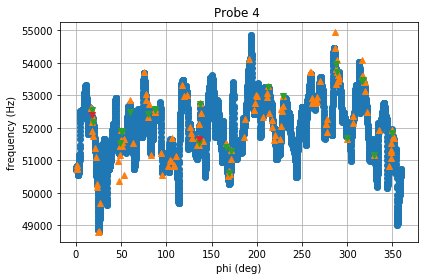

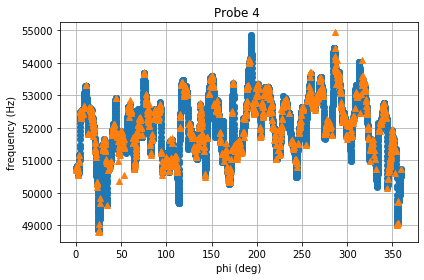

probe 4 : res=   25.78 : my cut takes     1.81% : simon's cut takes    16.09


In [12]:
from treat_data import spike_removalB
probe = 4
phi = phi_list[probe]
freq = freq_list[probe]
res = res_arr[probe]
print("probe {} : res={}".format(probe,res))
#do the first removal
new_phi,new_freq,removed_phi,removed_freq = my_spike_removal(phi,freq,1,res,1)
#do the second removal
new_phi,new_freq,removed2_phi,removed2_freq = my_spike_removal(new_phi,new_freq,1,res,1)
#do the third removal
new_phi,new_freq,removed3_phi,removed3_freq = my_spike_removal(new_phi,new_freq,1,res,1)
# do the simon removal
old_phi,old_freq,old_phi_removed,old_freq_removed  = spike_removalB(phi,freq,10,True)

#calculate some removal statistics
tot = removed_freq.size + removed2_freq.size + removed3_freq.size
my_percent = (tot/freq.size)*100.0
simon_percent = (old_freq_removed.size/freq.size)*100.0
    
#show both plots
plt.plot(new_phi,new_freq,'o-')
plt.plot(removed_phi,removed_freq,'^')
plt.plot(removed2_phi,removed2_freq,'v')
plt.plot(removed3_phi,removed3_freq,'v')
plt.title('Probe {} '.format(probe))
plt.xlabel('phi (deg)')
plt.ylabel('frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(old_phi,old_freq,'o-')
plt.plot(old_phi_removed,old_freq_removed,'^')
plt.title('Probe {} '.format(probe))
plt.xlabel('phi (deg)')
plt.ylabel('frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.show()
#print the statistics
print("probe {0} : res={1:8.2f} : my cut takes {2:8.2f}% : simon's cut takes {3:8.2f}".format(probe,res,my_percent,simon_percent))